# Graded Challenge 2

## i. Perkenalan

Selamat datang. Notebook ini dibuat sebagai pemenuhan penilaian kompetensi dari rangkaian <u>**Full Time Data Science (FTDS) Bootcamp Batch 9**</u> yang diadakan oleh Hacktiv8 dimana penulis atas nama **Judan Syamsul Hadad** dengan handlename **Riezn** merupakan salah satu pesertanya.

Dataset atau gambar yang digunakan pada notebook ini dapat dilihat [disini](https://cdn.cnn.com/cnnnext/dam/assets/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg).

### Objective

Pada notebook ini akan dilakukan image processing dengan menggunakan edge detection dan operasi perkalian matriks dengan langkah sebagai berikut:
1. Ubah gambar ke grayscale agar intensitas transisi warna antar pixel dapat disamakan dan karena analisis hanya dilakukan terhadap dua sumbu (x dan y)
2. Hitung gradien masing-masing sumbu
3. Hitung magnitude tiap pixel
4. Buat perbandingan dengan tiga threshold menggunakan algoritma *binary thresholding*
5. Kalikan matriks edge dengan edge detection terbaik dengan matriks lain yang memenuhi aturan perkalian matriks

### Problem Statement

1. Bagaimana pengaruh *threshold* terhadap *edge* yang dihasilkan dari algoritma *edge detection*
2. Bagaimana pengaruh perkalian matriks terhadap *edge* yang dihasilkan

## ii. Import Library

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import PIL

## iii. Data Loading

Load gambar menggunakan library PIL dan lihat gambar tersebut menggunakan pyplot dari library matplotlib.

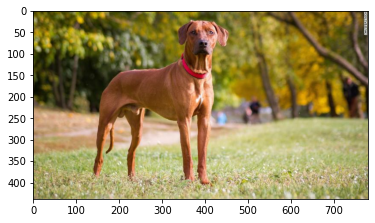

In [43]:
image = plt.imread('rhodesian_ridgeback.jpg') #load gambar ke variabel image
plt.imshow(image) #visualisasi variabel image

Gambar juga dapat di-load menggunakan library PIL seperti berikut:

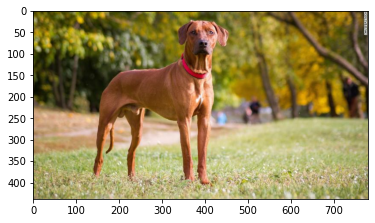

In [103]:
image_alt = PIL.Image.open('rhodesian_ridgeback.jpg')
plt.imshow(image_alt)

Kalau dilihat gambar ini masih dalam rentang warna penuh (RGB channel) dan fokus gambar ini berada pada objek anjing dengan background yang out of focus.

Gambar ini akan memiliki 3 channel pada dimensi ketiga seperti contoh berikut:

In [104]:
image[:,:,0] #channel Red

array([[ 86,  86,  87, ...,  48,  46,  59],
       [ 77,  77,  78, ...,  46,  64,  37],
       [ 64,  66,  68, ...,  56,  46,  70],
       ...,
       [165, 159, 151, ..., 150, 149, 145],
       [164, 157, 149, ..., 155, 153, 148],
       [164, 157, 148, ..., 160, 157, 150]], dtype=uint8)

In [105]:
image[:,:,1] #channel Green

array([[ 93,  94,  90, ...,  41,  39,  52],
       [ 84,  84,  83, ...,  38,  57,  30],
       [ 73,  73,  73, ...,  48,  36,  60],
       ...,
       [150, 144, 134, ..., 138, 137, 134],
       [149, 142, 131, ..., 143, 141, 136],
       [149, 142, 130, ..., 148, 145, 138]], dtype=uint8)

In [106]:
image[:,:,2] #channel Blue

array([[ 39,  37,  35, ...,  15,  11,  23],
       [ 30,  30,  27, ...,  15,  29,   1],
       [ 20,  19,  17, ...,  27,  11,  33],
       ...,
       [107, 101,  91, ...,  86,  85,  80],
       [108, 101,  91, ...,  93,  91,  84],
       [108, 101,  90, ..., 100,  95,  88]], dtype=uint8)

## iv. Data Cleaning

Ubah gambar ke grayscale terlebih dahulu agar intensitas transisi warna pada semua channel dapat disamakan dan deteksi edge dapat dilakukan pada dua sumbu x dan y saja

In [44]:
Red = image[:,:,0] #akses array di sumbu z = 0 untuk color filter Red
Green = image[:,:,1] #akses array di sumbu z = 1 untuk color filter Green
Blue = image[:,:,2] #akses array di sumbu z = 2 untuk color filter Blue
I = 0.299*Red + 0.587*Green + 0.114*Blue #deklarasi variabel I (grayscale) dengan komposisi RGB sesuai formula pada line ini

Bandingkan kelima gambar yang telah kita load dan proses sejauh ini.

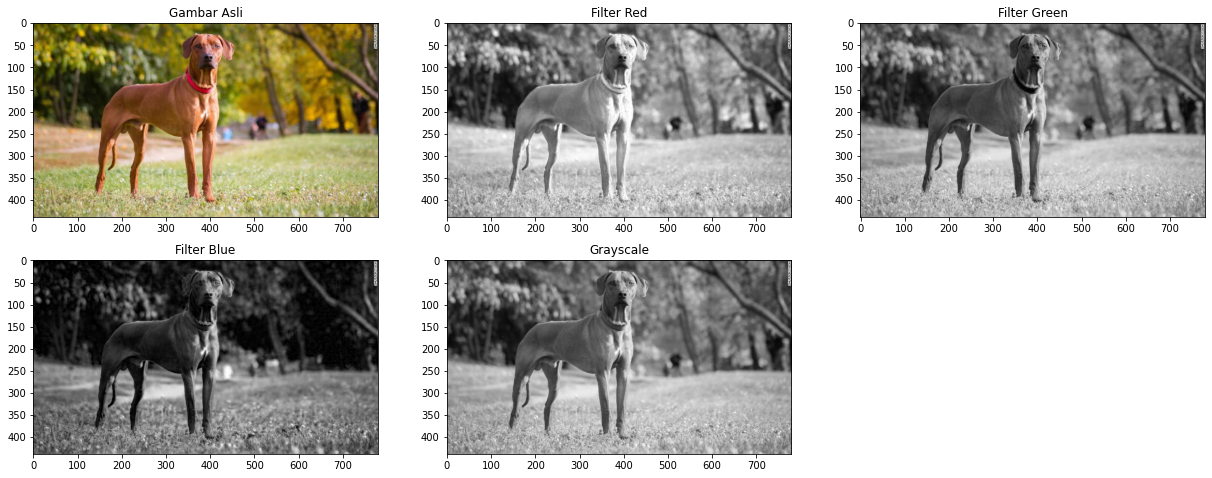

In [45]:
fig, ax = plt.subplots(ncols=3,nrows=2,figsize=(21,8))
ax[0,0].imshow(image) #visualisasi gambar asli
ax[0,0].set_title('Gambar Asli')
ax[0,1].imshow(Red) #visualisasi gambar dengan filter Red
ax[0,1].set_title('Filter Red')
ax[0,2].imshow(Green) #visualisasi gambar dengan filter Green
ax[0,2].set_title('Filter Green')
ax[1,0].imshow(Blue) #visualisasi gambar dengan filter Blue
ax[1,0].set_title('Filter Blue')
ax[1,1].imshow(I) #visualisasi gambar dalam grayscale
ax[1,1].set_title('Grayscale')
fig.delaxes(ax[1,2]) #hapus subplot di baris kedua kolom ketiga

Gambar grayscale yang kita olah masih terlihat seperti filter Green. Hal ini terjadi karena colormap belum di-set untuk grayscale.

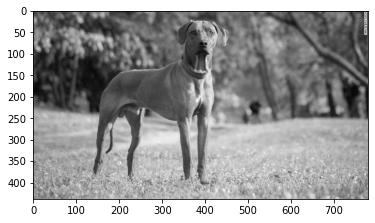

In [46]:
plt.gray() #set pyplot di bawah cell ini menjadi grayscale mengikuti color channel yang sudah di-format
plt.imshow(I)

Dengan grayscale, bagian leher anjing yang tidak terpapar cahaya matahari sulit untuk dibedakan. Karakteristik ini juga akan terbawa saat *edge detection*.

## v. Image Processing

### a. Menghitung gradien

Hitung dan simpan gradient dari gambar ke dalam I_dx dan I_dy

In [53]:
I_dx, I_dy = np.gradient(I) #perhitungan gradien I terhadap dua sumbu yang disimpan ke dalam I_dx dan I_dy

### b. Menghitung magnitude

Hitung magnitude di tiap pixel dan lihat visualisasinya

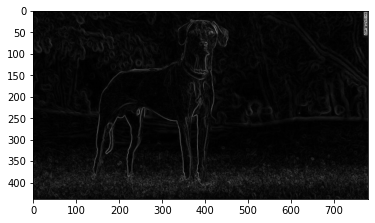

In [63]:
mag = np.sqrt(I_dx**2 + I_dy**2) #formula perhitungan magnitude menggunakan gradien dua sumbu
plt.imshow(mag)

### c. Thresholding

Dari visualisasi terlihat bahwa masih ada background noise. Sekarang kita coba set beberapa threshold dimulai dari 10 dengan mengubah magnitude di bawah threshold menjadi 0 (hitam) dan magnitube lebih dari sama dengan 10 menjadi 255 (putih).

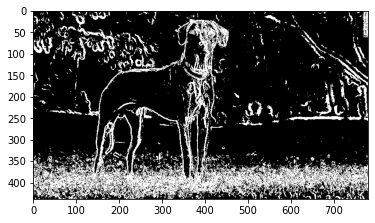

In [62]:
mag1 = mag.copy() #duplikat array mag ke mag1
mag1[mag1<10] = 0 #ubah nilai di bawah threshold menjadi 0
mag1[mag1>=10] = 255 #ubah nilai lebih dari sama dengan threshold menjadi 255
plt.imshow(mag1)

Kalau kita lihat visualisasinya, background noise masih terlihat pada gambar. Sekarang kita naikkan threshold ke 25.

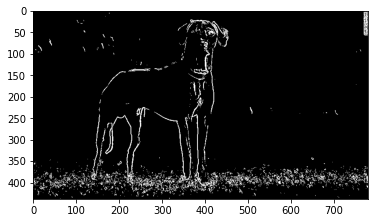

In [66]:
mag2 = mag.copy() #duplikat array mag ke mag1
mag2[mag2<25] = 0 #ubah nilai di bawah threshold menjadi 0
mag2[mag2>=25] = 255 #ubah nilai lebih dari sama dengan threshold menjadi 255
plt.imshow(mag2)

Background noise sudah banyak berkurang, tetapi kita lihat di bagian kaki belakang anjing terjadi penipisan garis. Jika kita naikkan lagi threshold ke 40 maka akan ada *edge* pada tubuh anjing yang hilang.

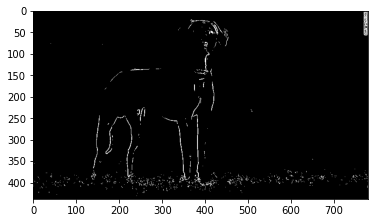

In [67]:
mag3 = mag.copy() #duplikat array mag ke mag1
mag3[mag3<40] = 0 #ubah nilai di bawah threshold menjadi 0
mag3[mag3>=40] = 255 #ubah nilai lebih dari sama dengan threshold menjadi 255
plt.imshow(mag3)

Seperti yang dijelaskan sebelumnya, banyak *edge* pada anjing yang hilang di threshold 40. Maka dari itu kita akan gunakan threshold 25 sebagai hasil *edge detection* terbaik. Perbandingan tiap threshold dapat dilihat di grafik berikut:

Text(0.5, 1.0, 'Threshold = 40')

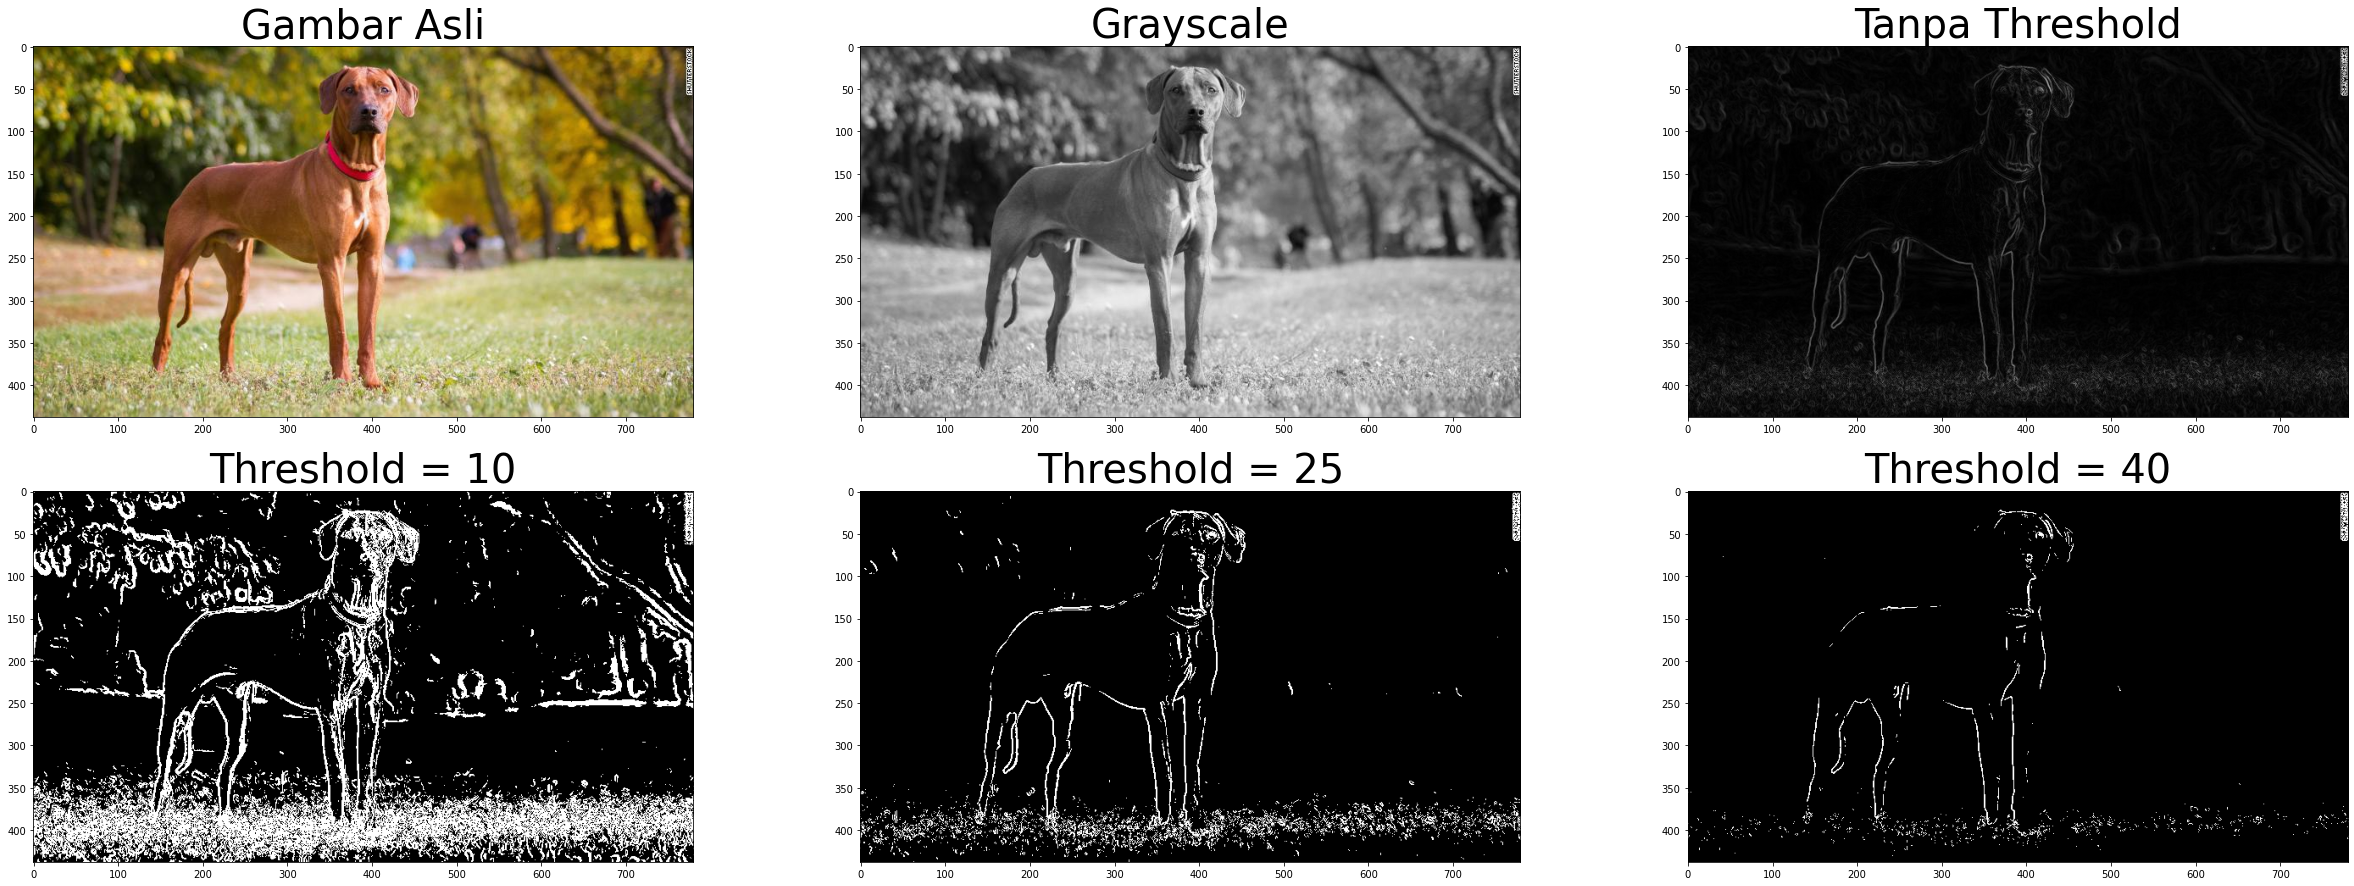

In [72]:
fig, ax = plt.subplots(ncols = 3, nrows=2, figsize=(42,15))
ax[0,0].imshow(image)  #visualisasi gambar asli
ax[0,0].set_title('Gambar Asli',fontsize=40)
ax[0,1].imshow(I)  #visualisasi gambar dengan grayscale
ax[0,1].set_title('Grayscale',fontsize=40)
ax[0,2].imshow(mag)  #visualisasi magnitude
ax[0,2].set_title('Tanpa Threshold',fontsize=40)
ax[1,0].imshow(mag1) #visualisasi magnitude dengan threshold = 10
ax[1,0].set_title(f'Threshold = 10',fontsize=40)
ax[1,1].imshow(mag2) #visualisasi magnitude dengan threshold = 25
ax[1,1].set_title(f'Threshold = 25',fontsize=40)
ax[1,2].imshow(mag3) #visualisasi magnitude dengan threshold = 40
ax[1,2].set_title(f'Threshold = 40',fontsize=40)

### d. Perkalian Matriks

Selanjutnya kita akan lakukan perkalian matriks. Pada notebook ini akan dilakukan *inverse* dimana warna pada gambar akan dibalik, hitam menjadi putih dan putih menjadi hitam dengan mengkalikan matriks yang dipilih di subbab sebelumnya dengan matriks Identitas invers.

Buat matriks pengali terlebih dahulu.

In [76]:
mag2.shape #cek shape mag2

(438, 780)

In [91]:
Inverse_Id = -1 * np.eye(N=mag2.shape[1],M=mag2.shape[1]) #buat matriks identitas invers menggunakan jumlah baris dan kolom  sama dengan jumlah kolom mag2
Inverse_Id

array([[-1., -0., -0., ..., -0., -0., -0.],
       [-0., -1., -0., ..., -0., -0., -0.],
       [-0., -0., -1., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -1., -0., -0.],
       [-0., -0., -0., ..., -0., -1., -0.],
       [-0., -0., -0., ..., -0., -0., -1.]])

In [86]:
Inverse_Id.shape #cek shape Inverse_Id

(780, 780)

Dengan mengikuti aturan matriks, maka ukuran matriks menjadi sebagai berikut:
- mag2dot = mag2(438 x 780) @ Inverse_Id(780 x 780)
- mag2dot(438 x 780)

In [89]:
mag2dot = mag2 @ Inverse_Id
mag2dot

array([[   0.,    0.,    0., ...,    0.,    0., -255.],
       [   0.,    0.,    0., ...,    0.,    0., -255.],
       [   0.,    0.,    0., ..., -255.,    0., -255.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

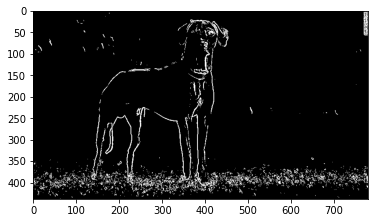

In [94]:
plt.imshow(mag2)

Text(0.5, 1.0, 'Inverse Threshold = 25')

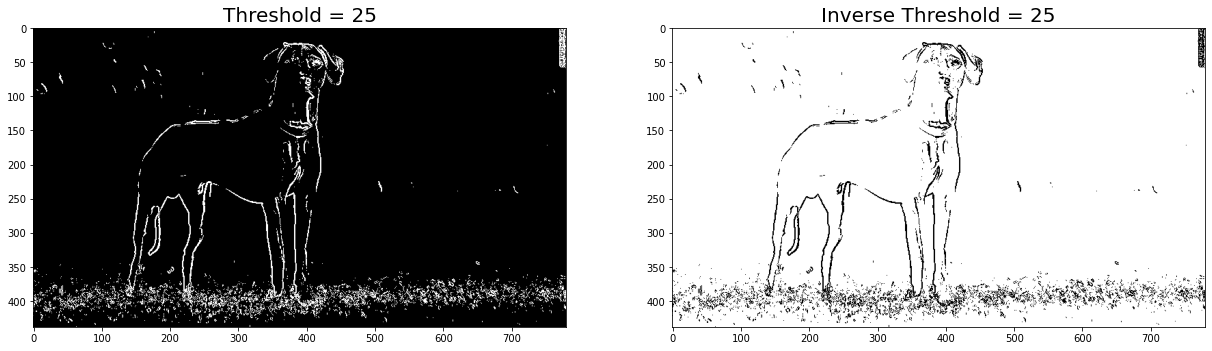

In [98]:
fig, ax = plt.subplots(ncols = 2, figsize=(21,15))
ax[0].imshow(mag2)
ax[0].set_title('Threshold = 25',fontsize=20)
ax[1].imshow(mag2dot)
ax[1].set_title('Inverse Threshold = 25',fontsize=20)

Invers warna berhasil dilakukan dengan menukar hitam ke putih dan sebaliknya. Secara ukuran gambar juga tidak ada perubahan karena matriks pengalinya sudah disesuaikan jumlah kolom dan barisnya agar produk perkalian menghasilkan matriks dengan ukuran yang sama dengan matriks edge detection.

Seperti yang dijelaskan pada bab iii. Data Loading, karakteristik leher anjing dimana tidak terjadi transisi warna signifikan tidak terdeteksi sebagai edge.

## vi. Hasil dan Kesimpulan

Berdasarkan pengolahan dan analisis terhadap gambar, berikut kesimpulan yang dapat ditarik berdasarkan *Problem Statement* pada bab i. Perkenalan:
1. Nilai threshold yang optimal untuk studi kasus pada notebook ini adalah 25. Pada nilai threshold ini sudah banyak background noise yang dihapus dan tidak banyak terjadi penipisan *edge* ataupun *edge* yang hilang. Karakteristik leher anjing yang tidak terdapat transisi warna terbawa ketika *edge detection* dan tidak dianggap sebagai *edge*.

Text(0.5, 1.0, 'Threshold = 40')

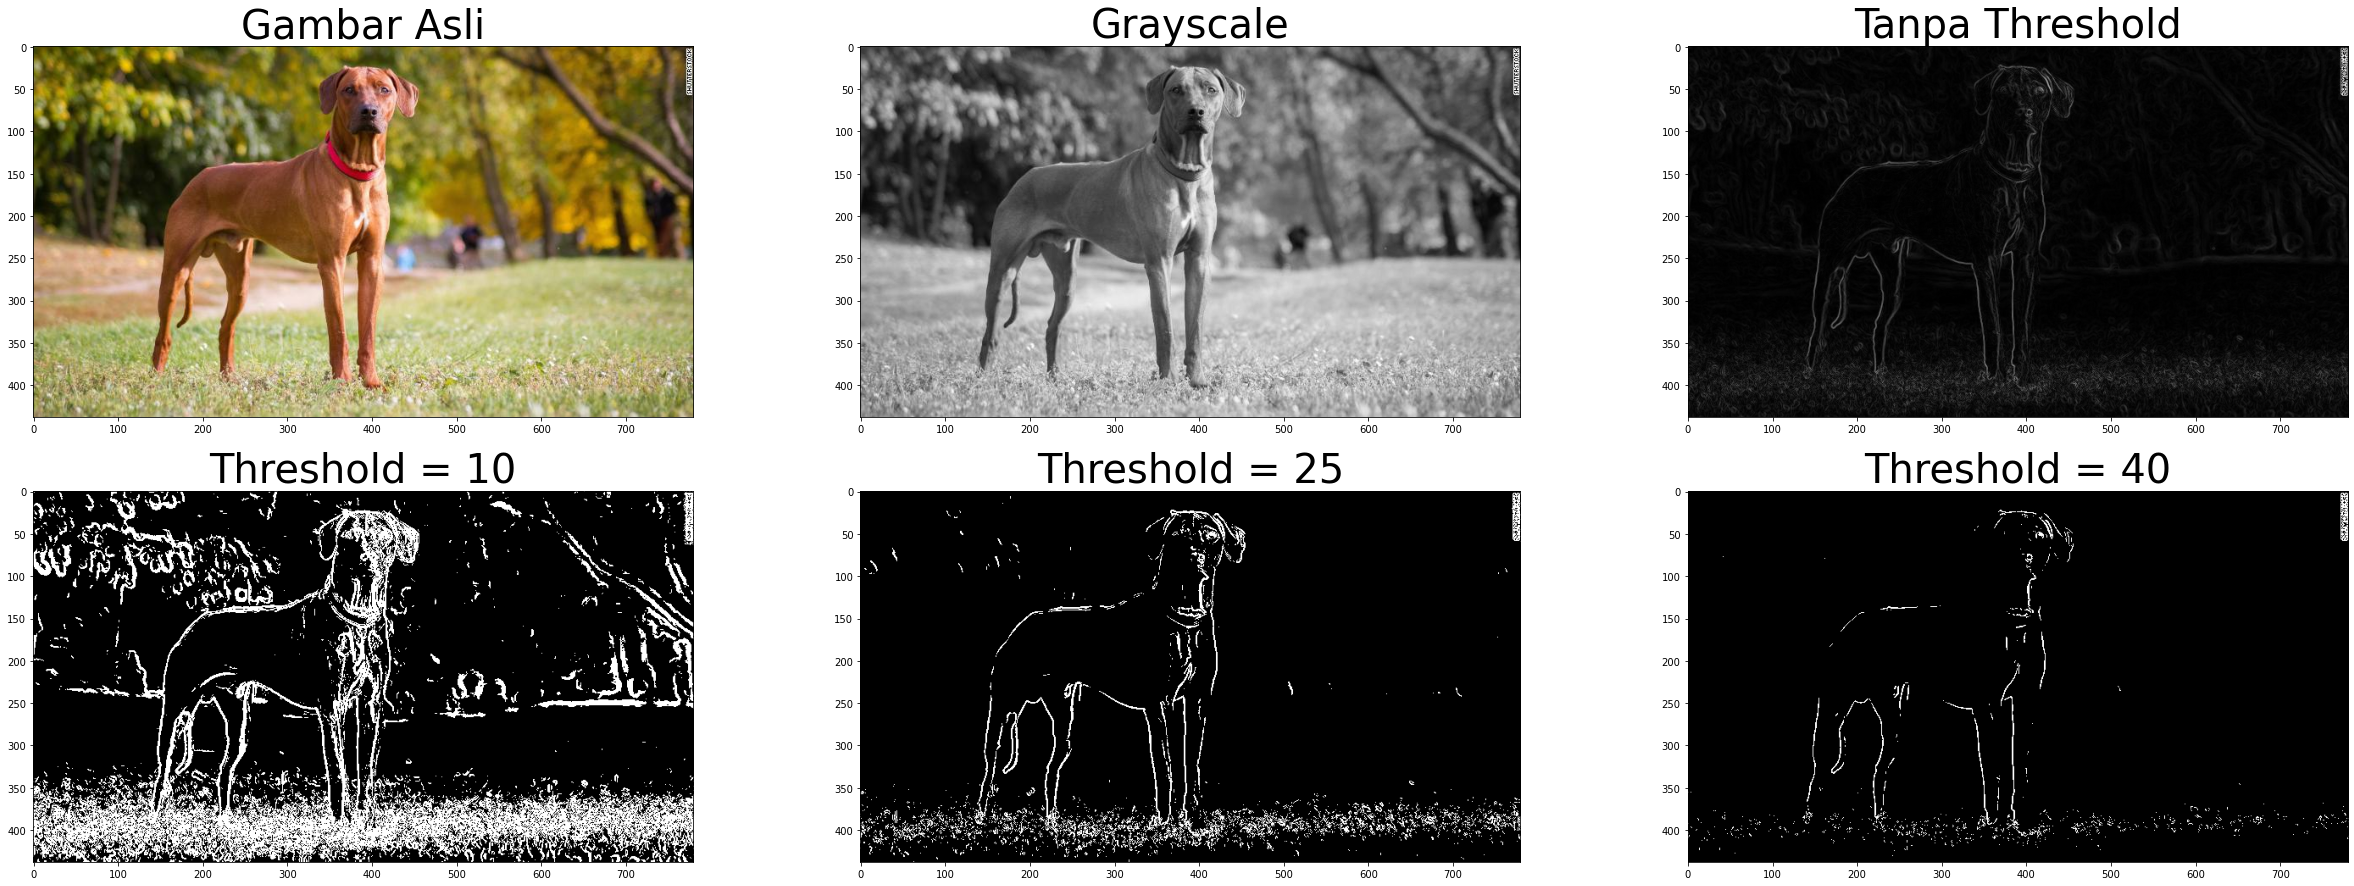

In [99]:
fig, ax = plt.subplots(ncols = 3, nrows=2, figsize=(42,15))
ax[0,0].imshow(image)  #visualisasi gambar asli
ax[0,0].set_title('Gambar Asli',fontsize=40)
ax[0,1].imshow(I)  #visualisasi gambar dengan grayscale
ax[0,1].set_title('Grayscale',fontsize=40)
ax[0,2].imshow(mag)  #visualisasi magnitude
ax[0,2].set_title('Tanpa Threshold',fontsize=40)
ax[1,0].imshow(mag1) #visualisasi magnitude dengan threshold = 10
ax[1,0].set_title(f'Threshold = 10',fontsize=40)
ax[1,1].imshow(mag2) #visualisasi magnitude dengan threshold = 25
ax[1,1].set_title(f'Threshold = 25',fontsize=40)
ax[1,2].imshow(mag3) #visualisasi magnitude dengan threshold = 40
ax[1,2].set_title(f'Threshold = 40',fontsize=40)

2. Hasil perkalian matriks menghasilkan produk matriks invers warna yang lebih mudah dicerna oleh mata dengan background putih dan *edge* hitam.

Text(0.5, 1.0, 'Inverse Threshold = 25')

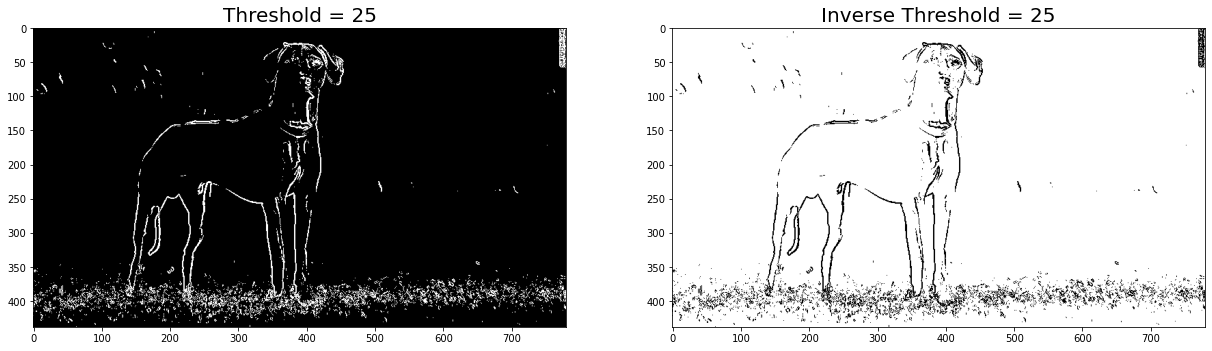

In [100]:
fig, ax = plt.subplots(ncols = 2, figsize=(21,15))
ax[0].imshow(mag2)
ax[0].set_title('Threshold = 25',fontsize=20)
ax[1].imshow(mag2dot)
ax[1].set_title('Inverse Threshold = 25',fontsize=20)